# Data Visualization in Python

Can Şerif Mekik

PhD Candidate <br/>
Department of Cognitive Science <br/>
Rensselaer Polytechnic Institute

December 13, 2021

<table align="left">
<tr>
<td><img src=CDSI_Fac.of.Sc_logo.png alt="CDSI Logo" width="300"/></td>
<td><img src=mcgill_ccr_approval_croppedforblock_0.png alt="CCR Approved Logo" width="300"/></td>
</tr>
</table>

## Introductory Remarks

This workshop assumes minimal working knowledge of Python. 

We will learn the basics of using the `matplotlib` library for producing beautiful data visualizations.

Matplotlib is the standard plotting package in Python. It is very flexible, capable of creating basic 2D plots, 3D plots, and even animations.

Working knowledge of the Pandas package is an asset, although it is not required. 

We will use `pandas` to prepare our data for plotting.

This workshop is heavily inspired by Ben Root's [Anatomy of Matplotlib](https://github.com/matplotlib/AnatomyOfMatplotlib/tree/master/).

### Useful Resources

The [Matplotlib Cheatsheet](https://matplotlib.org/cheatsheets/cheatsheets.pdf) is an excellent two-page summary of essential `matplotlib` features.

The [Official Matplotlib Docs](https://matplotlib.org/stable/index.html) are the single best resource for information short of the source code. It contains tutorials, reference documentation and more.

The [Example Gallery](https://matplotlib.org/stable/gallery/index.html) is particularly helpful when you have something specific in mind.

### Contents

1. Setup
2. Basic Concepts
3. Essential Plotting Methods
4. Controlling Figure Appearance
5. Dealing with Overplotting
6. Conclusion

## Setup

We will create and adjust various graphs using the matplotlib library.

To follow the workshop on your own machine, you should have Anaconda already installed.

https://www.anaconda.com/products/individual

This will automatically include the necessary dependencies.

Our data set is a subset of Semra Sevi's Canadian Federal Elections dataset.

You can find a copies of the dataset and code at the following addresses.

- Code: 
- Data:  

### Getting Ready to Code

`Jupyter` is a python tool for rich interactive coding that ships with Anaconda.

This presentation uses `Jupyter` notebook, in fact!

To get set, create a new folder in which you will work and copy the materials into it.

Then launch your machines console, navigate to your folder, activate your conda environment, and run the following.

```jupyter notebook```

This should launch Jupyter notebook in your browser. When it does, you can open the notebook.

#### Installing and Importing pandas

`pandas` comes pre-packaged in Anaconda.

You can always install it using the following pip command: ```pip install pandas```

If you have conda, but not pandas, you can also do: ```conda install pandas```

In [72]:
import pandas as pd

df = pd.read_pickle("cleaned.pkl")

#### Installing and Importing matplotlib

`matplotlib` comes pre-packaged in Anaconda.

You can always install it using the following pip command: ```pip install matplotlib```

If you have conda, but not pandas, you can also do: ```conda install matplotib```

When used with jupyter notebooks, matplotlib exhibits some specialized behavior. 

To get it to behave more like it would in a script, we run the following code snippet.

In [73]:
import matplotlib as mpl
mpl.use("nbagg")

The standard way to start using matplotlib is to run the following snippet.

In [74]:
import matplotlib.pyplot as plt

## Basic Concepts

Matplotlib figures are complex objects, so it is important to have a general understanding of their structure.

We'll start with that.

### Figure Creation vs. Display

Before getting into theory, let's take a quick look at the basic mechanics of creating and displaying figures.

<IPython.core.display.Javascript object>


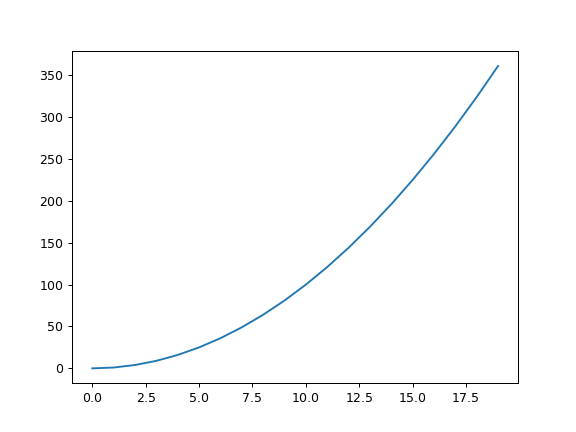

In [188]:
# Create some data
X, Y = [i for i in range(20)], [i ** 2 for i in range(20)]

plt.plot(X, Y) # Create a line plot of the data on 'current' figure
plt.show() # Show the result

This quick example hides a lot of detail. 

It's not uncommon to write code like this when trying to quickly understand what's going on with a dataset.

You should retain a few things from this example:
- We didn't have to explicitly create or configure a new figure because matplotlib always tracks a 'current' figure (similar to matlab). This is very convenient, but is not always the best option.
- To display or render a figure that we have created we **must** call `plt.show()` or something similar.
- Matplotlib figures are interactive: you can zoom, pan, save, etc.

### Anatomy of a Figure

To get a sense for the different components of a matplotlib figure, take a look at the image below. 

<img src=anatomy_of_a_figure.png alt="CDSI Logo" width="500"/>

This image is provided in the matplotlib docs, and its source code can be found [here](https://matplotlib.org/stable/gallery/showcase/anatomy.html).

Taking a step back, here are the main components of a figure:
- The `Figure` object, which contains all figure components
- `Axes`/`Subplots` which house the individual axes of each subplot 
- `XAxis`, `YAxis` in each subplot, which house data about individual axes (tick marks etc.)
- Other stuff

### Explicitly Initializing and Closing Figures.

Instead of using plotting functions from pyplot, like `plt.plot()`, it is better to create and work with `Axes` objects.

This style is more explicit and, ultimately, more flexible.

<IPython.core.display.Javascript object>


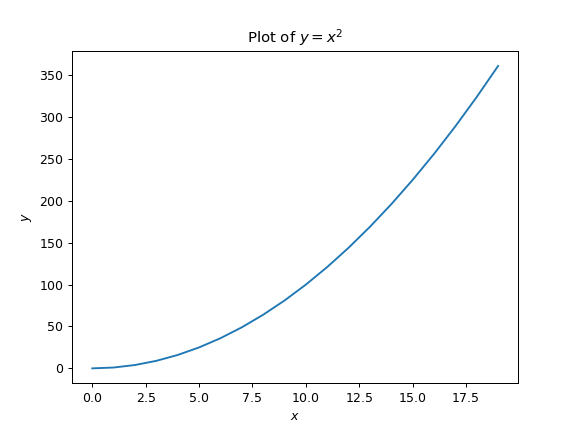

In [195]:
# Create some data
X, Y = [i for i in range(20)], [i ** 2 for i in range(20)]

fig, ax = plt.subplots(1) # Create a new figure with 1 subplot
# This function returns a tuple. The first element is the new figure.
# The second element is an `Axes` object if only one subplot is requested,
# Otherwise it is an array of `Axes` objects.

ax.set( # Add some labels
    title="Plot of $y = x^2$",
    xlabel="$x$",
    ylabel="$y$")

ax.plot(X, Y) # Create a line plot of the data on 'current' figure

fig.show() # Show the result

You can save the figure we just created as follows.

In [77]:
fig.savefig("example.png")

If you create and save a lot of figures programmatically, you might have to explicitly close figure to save memory, as below.

This is an unfortunate quirk of matplotlib. There are other workarounds that may be more or less suitable depending on your situation, but they are a bit more advanced and not covered in further detail here.

Notice that when you run the `plt.close()` on `fig`, it loses interactivity.

In [78]:
plt.close(fig)

## Essential Plotting Methods

Let's survey how to create some common plot types. 

We'll focus on typical statistical plots. See the [plot types](https://matplotlib.org/stable/plot_types/index.html) page for a more complete listing (e.g., quivers). 

### Plot

[Reference Documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)

Draws a line plot. Can plot markers, lines or both.

In [134]:
# calculate percentage of women candidates and MPs in each election
candidates = pd.DataFrame({
              "num": df.groupby("year").id.nunique(),
          "num_MPs": df[df.elected == "Elected"].copy().groupby("year").id.nunique(),
        "num_women": df[df.gender == "F"].copy().groupby("year").id.nunique(),
    "num_women_MPs": df[(df.gender == "F") & (df.elected == "Elected")].copy().groupby("year").id.nunique(),
})

candidates["pct_w_cand"] = 100 * candidates.num_women / candidates.num
candidates["pct_w_MPs"] = 100 * candidates.num_women_MPs / candidates.num_MPs
candidates = candidates.reset_index()
candidates

,year,num,num_MPs,num_women,num_women_MPs,pct_w_cand,pct_w_MPs
0,1993,2156,295,476,53,22.077922,17.966102
1,1997,1672,301,408,62,24.401914,20.598007
2,2000,1808,301,373,62,20.630531,20.598007
3,2004,1685,308,393,65,23.323442,21.103896
4,2006,1634,308,381,64,23.317013,20.779221
5,2008,1601,308,446,69,27.857589,22.402597
6,2011,1587,308,451,76,28.418399,24.675325
7,2015,1792,338,534,88,29.799107,26.035503
8,2019,2145,338,749,98,34.918415,28.994083
9,2021,2010,338,762,102,37.910448,30.177515


<IPython.core.display.Javascript object>


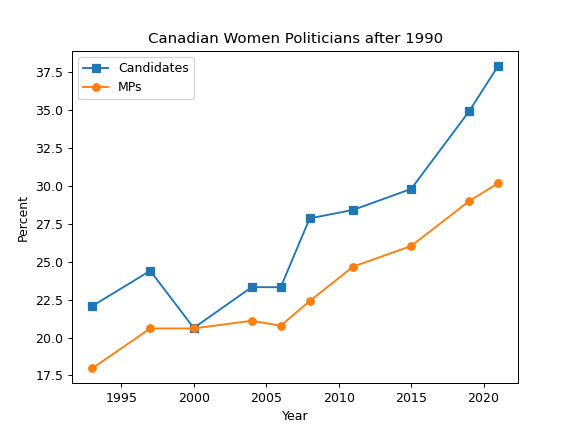

In [172]:
# Note that we can put multiple plots on the same Axes object.
# Also note that we can pass the variable name with pandas data object.
# Alternatively, we could directly pass the data.

fig, ax = plt.subplots(1)

ax.set(
    title="Canadian Women Politicians after 1990",
    xlabel="Year",
    ylabel="Percent")

ax.plot("year", "pct_w_cand", "-s", data=candidates, label="Candidates")
ax.plot("year", "pct_w_MPs", "-o", data=candidates, label="MPs")

ax.legend()

fig.show()

### Scatter

[Reference Documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)

Creates a scatter plot.

You can map values to marker colors and sizes as well.

<IPython.core.display.Javascript object>


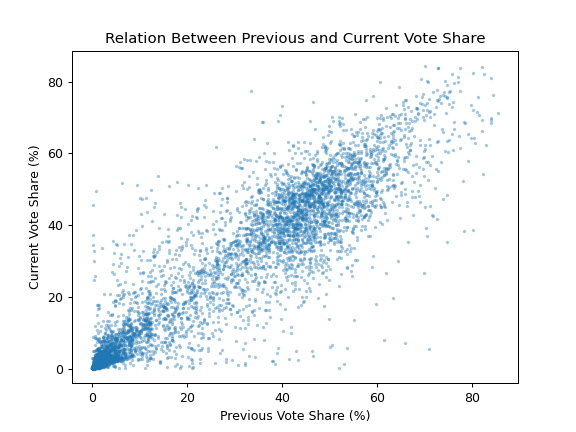

In [187]:
data_scatter = df.sort_values(["id", "year"])
data_scatter["percent_votes_lag"] = data_scatter.groupby("id").percent_votes.shift()
data_scatter

fig, ax = plt.subplots(1)

ax.set(
    title="Relation Between Previous and Current Vote Share",
    xlabel="Previous Vote Share (%)",
    ylabel="Current Vote Share (%)")

ax.scatter(
    x="percent_votes_lag", 
    y="percent_votes",
    s=3,
    alpha=.3,
    data=data_scatter[["percent_votes_lag", "percent_votes"]].dropna())

plt.show()

Let's try mapping a variable to dot color.

<IPython.core.display.Javascript object>


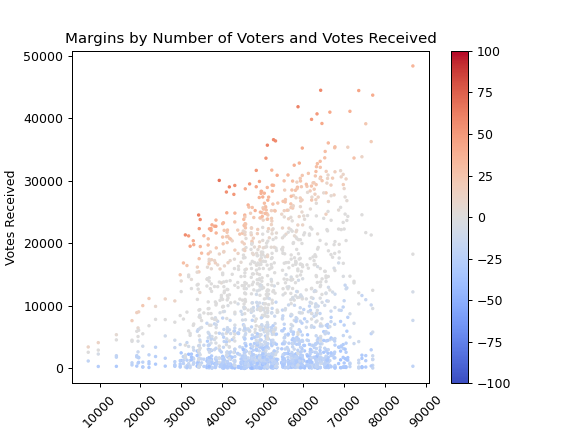

In [183]:
# Calculate the number of votes cast in each riding
data_scatter = df[df.year == 2021].copy()
data_scatter["num_votes"] = data_scatter.groupby(["year", "province", "riding"]).votes.transform(sum)


# Plot the margin against the number of votes in riding and number of votes received.
fig, ax = plt.subplots(1)

ax.set(
    title="Margins by Number of Voters and Votes Received",
    xlabel="Number of Voters",
    ylabel="Votes Received")
ax.tick_params(axis="x", labelrotation = 45)

sc = ax.scatter(
    x="num_votes", 
    y="votes", 
    s=3, 
    c="margin", 
    data=data_scatter,
    cmap="coolwarm",
    vmin=-100,
    vmax=+100)

fig.colorbar(sc)


plt.show()

### Bar

Bar charts.

## Controlling Plot Appearance


# Colors
This is, perhaps, the most important piece of vocabulary in Matplotlib. Given that Matplotlib is a plotting library, colors are associated with everything that is plotted in your figures. Matplotlib supports a [very robust language](http://matplotlib.org/api/colors_api.html#module-matplotlib.colors) for specifying colors that should be familiar to a wide variety of users.

### Colornames
First, colors can be given as strings. For very basic colors, you can even get away with just a single letter:

- b: blue
- g: green
- r: red
- c: cyan
- m: magenta
- y: yellow
- k: black
- w: white

Other colornames that are allowed are the HTML/CSS colornames such as "burlywood" and "chartreuse". See the [full list](https://www.w3schools.com/Colors/colors_names.asp) of the 140 color names. 

Matplotlib supports the [xkcd color names](https://xkcd.com/color/rgb/) prefxed by `'xkcd:'`.

Matplotlib also understands  `{'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan'}` which are the Tableau Colors from the ‘T10’ categorical palette (and the default color cycle);

### Hex values
Colors can also be specified by supplying a HTML/CSS hex string, such as `'#0000FF'` for blue. Support for an optional alpha channel was added for v2.0.

### 256 Shades of Gray
A gray level can be given instead of a color by passing a string representation of a number between 0 and 1, inclusive. `'0.0'` is black, while `'1.0'` is white. `'0.75'` would be a light shade of gray.

### Cycle references
With the advent of fancier color cycles coming from the many available styles, users needed a way to reference those colors in the style without explicitly knowing what they are. So, in v2.0, the ability to reference the first 10 iterations of the color cycle was added. Whereever one could specify a color, you can supply a 2 character string of 'C#'. So, 'C0' would be the first color, 'C1' would be the second, and so on and so forth up to 'C9'.

### RGB[A] tuples
You may come upon instances where the previous ways of specifying colors do not work. When all else fails, the universal language of colors for matplotlib is the RGB[A] tuple. This is the "Red", "Green", "Blue", and sometimes "Alpha" tuple of floats in the range of [0, 1]. One means full saturation of that channel, so a red RGBA tuple would be `(1.0, 0.0, 0.0, 1.0)`, whereas a partly transparent green RGBA tuple would be `(0.0, 1.0, 0.0, 0.75)`.  The documentation will usually specify whether it accepts RGB or RGBA tuples. Sometimes, a list of tuples would be required for multiple colors, and you can even supply a Nx3 or Nx4 numpy array in such cases.

In functions such as `plot()` and `scatter()`, while it may appear that they can take a color specification, what they really need is a "format specification", which includes color as part of the format. Unfortunately, such specifications are string only and so RGB[A] tuples are not supported for such arguments (but you can still pass an RGB[A] tuple for a "color" argument).

Oftentimes there is a separate argument for "alpha" where-ever you can specify a color. The value for "alpha" will usually take precedence over the alpha value in the RGBA tuple. There is no easy way around this inconsistency.

# Colormaps
Another very important property of many figures is the colormap. The job of a colormap is to relate a scalar value to a color. In addition to the regular portion of the colormap, an "over", "under" and "bad" color can be optionally defined as well. NaNs will trigger the "bad" part of the colormap.

As we all know, we create figures in order to convey information visually to our readers. There is much care and consideration that have gone into the design of these colormaps. Your choice in which colormap to use depends on what you are displaying. In mpl, the "jet" colormap has historically been used by default, but it will often not be the colormap you would want to use. Much discussion has taken place on the mailing lists with regards to what colormap should be default. The v2.0 release of Matplotlib adopted a new default colormap, 'viridis', along with some other stylistic changes to the defaults.

I want to acknowedge Nicolas Rougier and Tony Yu for putting significant effort in educating users in proper colormap selections. Furthermore, thanks goes to Nathaniel Smith and Stéfan van der Walt for developing the new perceptually uniform colormaps such as viridis. [Here is the talk](https://www.youtube.com/watch?v=xAoljeRJ3lU) they gave at SciPy 2015 that does an excelent job explaining colormaps.

Here is the full gallery of all the pre-defined colormaps, organized by the types of data they are usually used for.

### Markers

[Markers](http://matplotlib.org/api/markers_api.html) are commonly used in [`plot()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) and [`scatter()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter) plots, but also show up elsewhere. There is a wide set of markers available, and custom markers can even be specified.

marker     |  description  | marker    |  description    | marker   |  description  | marker    |  description  
:----------|:--------------|:----------|:----------------|:---------|:--------------|:----------|:--------------
"."        |  point        | "+"       |  plus           | ","      |  pixel        | "x"       |  cross
"o"        |  circle       | "D"       |  diamond        | "d"      |  thin_diamond |           |
"8"        |  octagon      | "s"       |  square         | "p"      |  pentagon     | "\*"      |  star
"&#124;"   |  vertical line| "\_"      | horizontal line |  "h"     |  hexagon1     | "H"       |  hexagon2
0          |  tickleft     | 4         |  caretleft      | "<"      | triangle_left | "3"       |  tri_left
1          |  tickright    | 5         |  caretright     | ">"      | triangle_right| "4"       |  tri_right
2          |  tickup       | 6         |  caretup        | "^"      | triangle_up   | "2"       |  tri_up
3          |  tickdown     | 7         |  caretdown      | "v"      | triangle_down | "1"       |  tri_down
"None"     |  nothing      | `None`    |  default        | " "      |  nothing      | ""        |  nothing

# Linestyles

Line styles are about as commonly used as colors. There are a few predefined linestyles available to use. Note that there are some advanced techniques to specify some custom line styles. [Here](http://matplotlib.org/1.3.0/examples/lines_bars_and_markers/line_demo_dash_control.html) is an example of a custom dash pattern.

linestyle          | description
-------------------|------------------------------
'-'                | solid
'--'               | dashed
'-.'               | dashdot
':'                | dotted
'None'             | draw nothing
' '                | draw nothing
''                 | draw nothing

Also, don't mix up ".-" (line with dot markers) and "-." (dash-dot line) when using the ``plot`` function!

## Ticks, Tick Lines, Tick Labels and Tickers
This is a constant source of confusion:

* A Tick is the *location* of a Tick Label.
* A Tick Line is the line that denotes the location of the tick.
* A Tick Label is the text that is displayed at that tick.
* A [`Ticker`](http://matplotlib.org/api/ticker_api.html#module-matplotlib.ticker) automatically determines the ticks for an Axis and formats the tick labels.

[`tick_params()`](https://matplotlib.org/api/axes_api.html#ticks-and-tick-labels) is often used to help configure your tickers.

# Axis Spines
Spines are the axis lines for a plot. Each plot can have four spines: "top", "bottom", "left" and "right". By default, they are set so that they frame the plot, but they can be individually positioned and configured via the [`set_position()`](http://matplotlib.org/api/spines_api.html#matplotlib.spines.Spine.set_position) method of the spine. Here are some different configurations.

### Style Sheets and rcParams

https://matplotlib.org/stable/tutorials/introductory/customizing.html